<a href="https://colab.research.google.com/github/ELBrown11/CodingDojoPortfolioProjects/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import pandas library
import pandas as pd
filename = '/content/drive/MyDrive/Coding Dojo Bootcamp/sales_predictions.csv'

# **PART 1**

In [3]:
#view first 5 rows of data
sales_data = pd.read_csv(filename)
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **PART 2**

In [4]:
#data exploration of possible missing data 
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


* `Item_Weight` and `Outlet_Size` columns have missing values

In [5]:
sales_data.shape

(8523, 12)

* there are 8523 rows and 12 columns

In [6]:
#data where there's missing data in Item_Weight column
missing_item_weight = sales_data['Item_Weight'].isnull()
sales_data.loc[missing_item_weight,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [7]:
#data where there's missing data in Outlet_Size column
missing_outlet_size = sales_data['Outlet_Size'].isnull()
sales_data.loc[missing_outlet_size,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


* thinking about using...
  * impute mean for `Item_Weight`
  * impute most frequent for `Outlet_Size`

In [8]:
#imputing missing values in item_weight with mean of item_weight column data
sales_data['Item_Weight'] = sales_data['Item_Weight'].fillna(sales_data.Item_Weight.mean())
#checking to see if data was filled
sales_data.Item_Weight.isnull().sum()

0

In [9]:
#count of missing data in Outlet_Size column
sales_data['Outlet_Size'].isnull().sum()

2410

In [10]:
sales_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

* most of the data in the `Outlet_Size` column is of the Medium type, could impute nulls with Medium?


In [11]:
#imputing missing values in outlet_size with mode of outlet_size column data
sales_data['Outlet_Size'] = sales_data['Outlet_Size'].fillna('Medium')
sales_data.Outlet_Size.isnull().sum()

0

In [12]:
#summary statistics foe each numerical column
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
#exploration of the types of values in Item Fat Content column
sales_data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

* actual fat content types are only Low Fat or Regular
  * LF = Low Fat
  * reg = Regular
  * low fat = Low Fat

In [14]:
#replaces abbreviated terms with full phrases
sales_data['Item_Fat_Content'].replace({"reg":"Regular","low fat":"Low Fat", "Low Far":"Low Fat"}, inplace=True)
sales_data.Item_Fat_Content.value_counts()

Low Fat    5201
Regular    3006
LF          316
Name: Item_Fat_Content, dtype: int64

In [15]:
#explore the types of values in the Item Type column
sales_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

* all of these seem to be actually distinct

In [16]:
#exploration of types of values in the Outlet_Type column
sales_data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

* these types seem to tbe distinct, no need for replacement of data

In [17]:
#exploration of types of values in the Outlet_Location_Type column
sales_data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

* these types seem to be distinct, no need for replacement of data

# **PART 3**

In [28]:
#import more libraries
import seaborn as sns
import matplotlib.pyplot as plt


Text(0.5, 0, 'Maximum Retail Prices Paid')

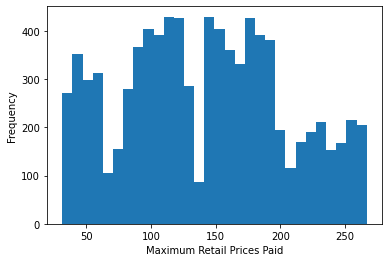

In [46]:
#histogram for item MRP
sales_data['Item_MRP'].plot(kind='hist', bins=30)
plt.xlabel('Maximum Retail Prices Paid')

- MRP = maximum retail price
- sort of a flat distribution of data, not quite normal distribution 

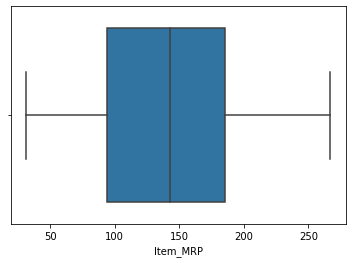

In [47]:
#boxplot for item maxiumum retail price
ax = sns.boxplot(x=sales_data['Item_MRP'])

Text(0.5, 0, 'Number of Sales')

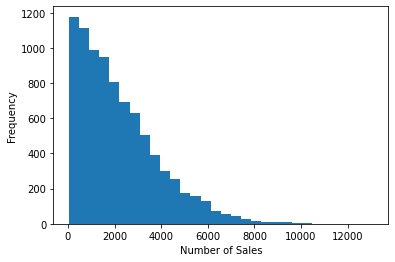

In [38]:
#histogram for item outlet sales
sales_data['Item_Outlet_Sales'].plot(kind='hist', bins=30)
plt.xlabel('Number of Sales')

* right skewed
* although there are outliers the rest of the data is fairly evenly distrubuted

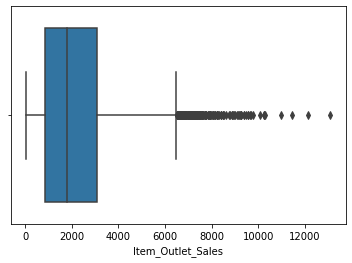

In [44]:
#boxplot for item outlet sales
#sales_data.boxplot(column=['Item_Outlet_Sales'], vert=False)
ax = sns.boxplot(x=sales_data['Item_Outlet_Sales'])

- a lot of outliers on the right side which creates the tail which makes this data right skewed

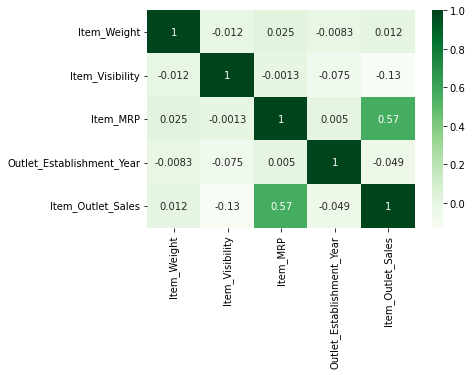

In [21]:
#heatmap of correlation
corr = sales_data.corr()
sns.heatmap(corr, cmap = 'Greens', annot=True)

- moderate correlation =  (0.5 - 0.7)
- low correlation = (0.3 - 0.5)

---
* the strongest correlation is between `Item_MRP` and `Item_Outlet_Sales` -- this correlation is moderate though
  * this is a positive correlation 
